## Classification

- predict the species of a flower given the flower's sepal length and width, and petal length and width
- there are 3 species: setosa, versicolor, virginica

### import required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [3]:
df = pd.read_csv('iris.csv')

### exploratory data analysis

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### convert the species variable from object (string) to numeric

In [17]:
from sklearn.preprocessing import LabelEncoder

# create an encoder object
encoder = LabelEncoder()

# fit the data to be coverted
encoder.fit(df['species'])

# find the classes
# print(encoder.classes_)

# convert the 3 species to 3 numerical representations
df['species'] = encoder.transform(df['species'])
# df['species'] = encoder.fit_transform(df['species'])

In [18]:
df['species'].unique()

array([0, 1, 2])

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
# find the significant independent variables
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


### split the data

In [20]:
# create the x
x = df.drop('species', axis=1)

# create the y
y = df['species']

In [32]:
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4564546)

### build the model

In [53]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model = LogisticRegressionCV(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

### model evaluation

In [34]:
# calculate the y_pred
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]])

In [36]:
from sklearn.metrics import accuracy_score

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [37]:
from sklearn.metrics import precision_score

# calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9714285714285714

In [38]:
from sklearn.metrics import recall_score

# calculate the recall 
recall = recall_score(y_test, y_pred, average='weighted')
recall


0.9666666666666667

In [39]:
from sklearn.metrics import f1_score

# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.9671550671550672

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### result visualization

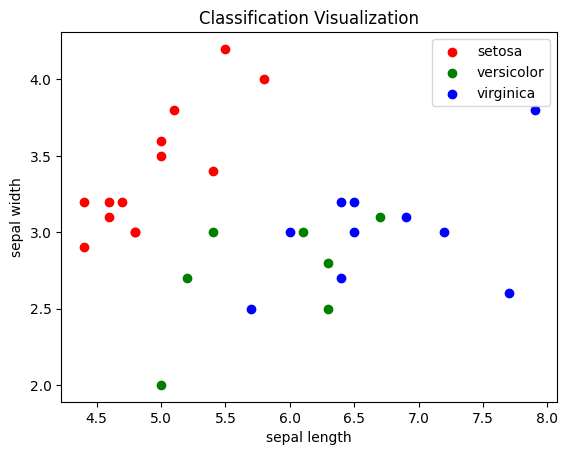

In [50]:
# plt.scatter(df['sepal_length'], df['sepal_width'])

# identify the records for setosa (0)
plt.scatter(x_test['sepal_length'][y_pred == 0], x_test['sepal_width'][y_pred == 0], color="red", label="setosa")

# identify the records for versicolor (1)
plt.scatter(x_test['sepal_length'][y_pred == 1], x_test['sepal_width'][y_pred == 1], color="green", label="versicolor")

# identify the records for virginica (2)
plt.scatter(x_test['sepal_length'][y_pred == 2], x_test['sepal_width'][y_pred == 2], color="blue", label="virginica")

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Classification Visualization")
plt.legend()

### test case

In [52]:
sepal_length = 5.3
sepal_width = 3.2
petal_length = 6.1
petal_width = 1.8
prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
prediction

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


array([2])

### serialize the model

In [56]:
# install pickle5
%pip install pickle4

  Preparing metadata (setup.py) ... done
  Created wheel for pickle4: filename=pickle4-0.0.1-py2.py3-none-any.whl size=19699 sha256=650780726554662326e1d1b54a715b5cead5c42afab29f7e8cdf6a98f369f4e7
  Stored in directory: /Users/amitk/Library/Caches/pip/wheels/6b/d8/c3/ffeba120902a54139f1457d1fd2a089d3a39c21d1f579a601d
Successfully built pickle4
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pickle

with open("iris_model.pkl", "wb") as file:
    file.write(pickle.dumps(model))